In [2]:
import pickle
import numpy as np
from pathlib import Path

np.set_printoptions(precision=5, suppress=True)

DATA_DIR = Path("Cleaned_US_data")

def load_split(filename: str):
    """Load one split and print a compact summary ."""
    path = DATA_DIR / filename
    with open(path, "rb") as f:
        data = pickle.load(f)

    print(f"\n=== {filename} ===")
    print("Type:", type(data))
    print("Num trajectories (vessels):", len(data))
    if len(data) > 0:
        s = data[0]
        traj = np.asarray(s["traj"])
        print("Sample keys:", list(s.keys()))
        print("MMSI:", s.get("mmsi"))
        print("traj shape:", traj.shape)
        print("traj dtype:", traj.dtype)
        print("first row:", traj[0])
    return data

# Load splits
train_data = load_split("us_continent_2024_train_track.pkl")
valid_data = load_split("us_continent_2024_valid_track.pkl")
test_data  = load_split("us_continent_2024_test_track.pkl")

# Optional: quick totals
total_msgs_train = sum(np.asarray(v["traj"]).shape[0] for v in train_data)
total_msgs_valid = sum(np.asarray(v["traj"]).shape[0] for v in valid_data)
total_msgs_test  = sum(np.asarray(v["traj"]).shape[0] for v in test_data)
print(f"\nTotals — train: {total_msgs_train:,}  valid: {total_msgs_valid:,}  test: {total_msgs_test:,}")



=== us_continent_2024_train_track.pkl ===
Type: <class 'list'>
Num trajectories (vessels): 124298
Sample keys: ['mmsi', 'traj']
MMSI: 538007560
traj shape: (144, 11)
traj dtype: float64
first row: [2.12772e-01 7.02774e-01 3.06667e-01 1.20000e-01 4.70000e+01 1.70481e+09
 5.38008e+08 7.00000e+01 1.75000e+02 2.80000e+01 7.00000e+01]

=== us_continent_2024_valid_track.pkl ===
Type: <class 'list'>
Num trajectories (vessels): 5472
Sample keys: ['mmsi', 'traj']
MMSI: 319266100
traj shape: (103, 11)
traj dtype: float64
first row: [1.26410e-01 8.03582e-01 3.50000e-01 9.73333e-01 3.36000e+02 1.70869e+09
 3.19266e+08 3.70000e+01 3.50000e+01 7.00000e+00 3.70000e+01]

=== us_continent_2024_test_track.pkl ===
Type: <class 'list'>
Num trajectories (vessels): 13828
Sample keys: ['mmsi', 'traj']
MMSI: 368062150
traj shape: (46, 11)
traj dtype: float64
first row: [2.34621e-01 6.51124e-01 0.00000e+00 8.01111e-01 5.11000e+02 1.70897e+09
 3.68062e+08 3.10000e+01 9.00000e+00 6.00000e+00 3.10000e+01]

Total

In [3]:

import pandas as pd

# Choose one trajectory 
v = train_data[0]
traj = np.asarray(v["traj"])

# Column names 
columns = ['lat','lon','sog','cog','heading','timestamp','mmsi','vessel_type','length','width','cargo']

# Build a DataFrame for pretty printing
df = pd.DataFrame(traj, columns=columns[:traj.shape[1]])

# Force fixed-point display 
pd.options.display.float_format = '{:.6f}'.format

# If you want timestamp as datetime (keeps original too)
if 'timestamp' in df.columns:
    df['timestamp_dt'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')

# Show a few rows without scientific notation
print(f"MMSI: {v.get('mmsi')}")
df.head(10)


MMSI: 538007560


,lat,lon,sog,cog,heading,timestamp,mmsi,vessel_type,length,width,cargo,timestamp_dt
0,0.212772,0.702774,0.306667,0.120000,47.000000,1704805702.000000,538007560.000000,70.000000,175.000000,28.000000,70.000000,2024-01-09 13:08:22
1,0.213275,0.702954,0.313998,0.111760,45.485531,1704806302.000000,538007560.000000,70.000000,175.000000,28.000000,70.000000,2024-01-09 13:18:22
2,0.213788,0.703135,0.306000,0.111444,42.400000,1704806902.000000,538007560.000000,70.000000,175.000000,28.000000,70.000000,2024-01-09 13:28:22
3,0.214291,0.703304,0.290245,0.094197,44.715596,1704807502.000000,538007560.000000,70.000000,175.000000,28.000000,70.000000,2024-01-09 13:38:22
4,0.214801,0.703481,0.319901,0.096133,44.782178,1704808102.000000,538007560.000000,70.000000,175.000000,28.000000,70.000000,2024-01-09 13:48:22
5,0.215253,0.703646,0.241429,0.105794,43.571429,1704808702.000000,538007560.000000,70.000000,175.000000,28.000000,70.000000,2024-01-09 13:58:22
6,0.215626,0.703772,0.220000,0.106667,43.000000,1704809302.000000,538007560.000000,70.000000,175.000000,28.000000,70.000000,2024-01-09 14:08:22
7,0.215956,0.703906,0.209218,0.112836,56.000000,1704809902.000000,538007560.000000,70.000000,175.000000,28.000000,70.000000,2024-01-09 14:18:22
8,0.216392,0.704066,0.286184,0.095765,38.855072,1704810502.000000,538007560.000000,70.000000,175.000000,28.000000,70.000000,2024-01-09 14:28:22
9,0.216881,0.704241,0.273333,0.119683,37.428571,1704811102.000000,538007560.000000,70.000000,175.000000,28.000000,70.000000,2024-01-09 14:38:22


In [4]:
np.set_printoptions(suppress=True)  
print(np.array2string(traj[:10], formatter={'float_kind':lambda x: f"{x:.6f}"}))


[[0.212772 0.702774 0.306667 0.120000 47.000000 1704805702.000000
  538007560.000000 70.000000 175.000000 28.000000 70.000000]
 [0.213275 0.702954 0.313998 0.111760 45.485531 1704806302.000000
  538007560.000000 70.000000 175.000000 28.000000 70.000000]
 [0.213788 0.703135 0.306000 0.111444 42.400000 1704806902.000000
  538007560.000000 70.000000 175.000000 28.000000 70.000000]
 [0.214291 0.703304 0.290245 0.094197 44.715596 1704807502.000000
  538007560.000000 70.000000 175.000000 28.000000 70.000000]
 [0.214801 0.703481 0.319901 0.096133 44.782178 1704808102.000000
  538007560.000000 70.000000 175.000000 28.000000 70.000000]
 [0.215253 0.703646 0.241429 0.105794 43.571429 1704808702.000000
  538007560.000000 70.000000 175.000000 28.000000 70.000000]
 [0.215626 0.703772 0.220000 0.106667 43.000000 1704809302.000000
  538007560.000000 70.000000 175.000000 28.000000 70.000000]
 [0.215956 0.703906 0.209218 0.112836 56.000000 1704809902.000000
  538007560.000000 70.000000 175.000000 28.00

In [5]:

LAT_MIN, LAT_MAX = 20.0, 60.0
LON_MIN, LON_MAX = -160.0, -60.0
SPEED_MAX = 30.0
COG_MAX = 360.0

columns = ['lat','lon','sog','cog','heading','timestamp','mmsi','vessel_type','length','width','cargo']

def denormalize_traj(traj_np: np.ndarray, cols=columns) -> pd.DataFrame:
    df = pd.DataFrame(traj_np, columns=cols[:traj_np.shape[1]]).copy()

    # denorm according to data_prep_v2.py
    df['lat'] = LAT_MIN + df['lat'] * (LAT_MAX - LAT_MIN)
    df['lon'] = LON_MIN + df['lon'] * (LON_MAX - LON_MIN)
    df['sog'] = df['sog'] * SPEED_MAX
    df['cog'] = df['cog'] * COG_MAX

    # convenience timestamp column
    if 'timestamp' in df.columns:
        df['BaseDateTime'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')

    # order like your Excel view
    order = ['mmsi','BaseDateTime','lat','lon','sog','cog','heading','vessel_type','length','width','cargo']
    return df[[c for c in order if c in df.columns]]

# Example: denormalize one vessel from your loaded train split
demo_df = denormalize_traj(np.asarray(train_data[0]['traj']))
pd.options.display.float_format = '{:.6f}'.format
demo_df.head(12)


,mmsi,BaseDateTime,lat,lon,sog,cog,heading,vessel_type,length,width,cargo
0,538007560.000000,2024-01-09 13:08:22,28.510860,-89.722550,9.200000,43.200000,47.000000,70.000000,175.000000,28.000000,70.000000
1,538007560.000000,2024-01-09 13:18:22,28.531002,-89.704614,9.419936,40.233762,45.485531,70.000000,175.000000,28.000000,70.000000
2,538007560.000000,2024-01-09 13:28:22,28.551534,-89.686476,9.180000,40.120000,42.400000,70.000000,175.000000,28.000000,70.000000
3,538007560.000000,2024-01-09 13:38:22,28.571645,-89.669612,8.707339,33.911009,44.715596,70.000000,175.000000,28.000000,70.000000
4,538007560.000000,2024-01-09 13:48:22,28.592046,-89.651920,9.597030,34.607921,44.782178,70.000000,175.000000,28.000000,70.000000
5,538007560.000000,2024-01-09 13:58:22,28.610111,-89.635360,7.242857,38.085714,43.571429,70.000000,175.000000,28.000000,70.000000
6,538007560.000000,2024-01-09 14:08:22,28.625030,-89.622770,6.600000,38.400000,43.000000,70.000000,175.000000,28.000000,70.000000
7,538007560.000000,2024-01-09 14:18:22,28.638259,-89.609432,6.276543,40.620988,56.000000,70.000000,175.000000,28.000000,70.000000
8,538007560.000000,2024-01-09 14:28:22,28.655694,-89.593449,8.585507,34.475362,38.855072,70.000000,175.000000,28.000000,70.000000
9,538007560.000000,2024-01-09 14:38:22,28.675226,-89.575933,8.200000,43.085714,37.428571,70.000000,175.000000,28.000000,70.000000


In [6]:


DT_SEC = 600.0        # 10 minutes between rows
WIN_STEPS = 6         # 1 hour window (6 * 10min)

def _wrap_deg(delta):
    return (delta + 180.0) % 360.0 - 180.0

def _haversine_km(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2.0)**2
    return 2.0 * R * np.arctan2(np.sqrt(a), np.sqrt(1.0 - a))

def add_per_step_features(df: pd.DataFrame) -> pd.DataFrame:
    out = df.sort_values("BaseDateTime").reset_index(drop=True).copy()

    # finite diffs
    out["d_sog"] = out["sog"].diff().fillna(0.0)
    d_cog_raw = out["cog"].diff().fillna(0.0).to_numpy()
    out["d_cog"] = _wrap_deg(d_cog_raw)

    # acceleration (knots/s, knots/hr)
    out["accel_knots_per_s"]  = out["d_sog"] / DT_SEC
    out["accel_knots_per_hr"] = out["accel_knots_per_s"] * 3600.0

    # turn rate (deg/s, deg/min)
    tr_s = np.abs(out["d_cog"]) / DT_SEC
    out["turnrate_deg_per_s"]   = tr_s
    out["turnrate_deg_per_min"] = tr_s * 60.0

    # spikes & stopped
    out["cog_spike_deg"] = np.abs(out["d_cog"])
    out["stopped"] = (out["sog"] < 1.0).astype(int)

    # step & cumulative distance
    step_dist = np.zeros(len(out), dtype=float)
    if len(out) > 1:
        lat1, lon1 = out["lat"].to_numpy()[:-1], out["lon"].to_numpy()[:-1]
        lat2, lon2 = out["lat"].to_numpy()[1:],  out["lon"].to_numpy()[1:]
        step_dist[1:] = _haversine_km(lat1, lon1, lat2, lon2)
    out["step_dist_km"] = step_dist
    out["cum_dist_km"]  = out["step_dist_km"].cumsum()

    return out

def add_window_features(df: pd.DataFrame, win_steps: int = WIN_STEPS) -> pd.DataFrame:
    out = df.copy()

    # rolling stats over the last `win_steps` samples (aligned to current row)
    out["w_mean_sog"] = out["sog"].rolling(win_steps, min_periods=1).mean()
    out["w_std_sog"]  = out["sog"].rolling(win_steps, min_periods=1).std().fillna(0.0)

    out["w_mean_accel_hr"] = out["accel_knots_per_hr"].rolling(win_steps, min_periods=1).mean()
    out["w_std_accel_hr"]  = out["accel_knots_per_hr"].rolling(win_steps, min_periods=1).std().fillna(0.0)

    out["w_mean_turn_deg_min"] = out["turnrate_deg_per_min"].rolling(win_steps, min_periods=1).mean()
    out["w_std_turn_deg_min"]  = out["turnrate_deg_per_min"].rolling(win_steps, min_periods=1).std().fillna(0.0)

    out["w_max_cog_spike"] = out["cog_spike_deg"].rolling(win_steps, min_periods=1).max()
    out["w_pct_stopped"]   = out["stopped"].rolling(win_steps, min_periods=1).mean()

    # path length in the window (km)
    out["w_path_km"] = out["step_dist_km"].rolling(win_steps, min_periods=2).sum()

    # straightness in the window = displacement / path
    disp = np.zeros(len(out), dtype=float)
    lat = out["lat"].to_numpy()
    lon = out["lon"].to_numpy()
    for i in range(len(out)):
        j0 = max(0, i - win_steps + 1)
        if i - j0 >= 1:
            disp[i] = _haversine_km(lat[j0], lon[j0], lat[i], lon[i])
    with np.errstate(invalid='ignore', divide='ignore'):
        out["w_straightness"] = np.where(out["w_path_km"] > 0, disp / out["w_path_km"], np.nan)

    return out

# ---------- Use on your existing denormalized demo_df ----------
aug_df = add_per_step_features(demo_df)
aug_df = add_window_features(aug_df, win_steps=6)  # 1h windows (6×10min)

aug_df.head(12)


,mmsi,BaseDateTime,lat,lon,sog,cog,heading,vessel_type,length,width,...,w_mean_sog,w_std_sog,w_mean_accel_hr,w_std_accel_hr,w_mean_turn_deg_min,w_std_turn_deg_min,w_max_cog_spike,w_pct_stopped,w_path_km,w_straightness
0,538007560.000000,2024-01-09 13:08:22,28.510860,-89.722550,9.200000,43.200000,47.000000,70.000000,175.000000,28.000000,...,9.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1,538007560.000000,2024-01-09 13:18:22,28.531002,-89.704614,9.419936,40.233762,45.485531,70.000000,175.000000,28.000000,...,9.309968,0.155518,0.659807,0.933108,0.148312,0.209745,2.966238,0.000000,2.843769,1.000000
2,538007560.000000,2024-01-09 13:28:22,28.551534,-89.686476,9.180000,40.120000,42.400000,70.000000,175.000000,28.000000,...,9.266645,0.133130,-0.040000,1.380049,0.102667,0.168068,2.966238,0.000000,5.733644,0.999998
3,538007560.000000,2024-01-09 13:38:22,28.571645,-89.669612,8.707339,33.911009,44.715596,70.000000,175.000000,28.000000,...,9.126819,0.300036,-0.738991,1.795562,0.232225,0.293211,6.208991,0.000000,8.510912,0.999916
4,538007560.000000,2024-01-09 13:48:22,28.592046,-89.651920,9.597030,34.607921,44.782178,70.000000,175.000000,28.000000,...,9.220861,0.334269,0.476436,3.131188,0.199718,0.264126,6.208991,0.000000,11.362328,0.999937
5,538007560.000000,2024-01-09 13:58:22,28.610111,-89.635360,7.242857,38.085714,43.571429,70.000000,175.000000,28.000000,...,8.891194,0.861088,-1.957143,6.586144,0.224395,0.243852,6.208991,0.000000,13.940861,0.999902
6,538007560.000000,2024-01-09 14:08:22,28.625030,-89.622770,6.600000,38.400000,43.000000,70.000000,175.000000,28.000000,...,8.457860,1.243776,-2.600000,6.545021,0.229633,0.238343,6.208991,0.000000,16.005346,0.822226
7,538007560.000000,2024-01-09 14:18:22,28.638259,-89.609432,6.276543,40.620988,56.000000,70.000000,175.000000,28.000000,...,7.933962,1.408590,-3.143392,6.284681,0.217212,0.236085,6.208991,0.000000,15.125831,0.808553
8,538007560.000000,2024-01-09 14:28:22,28.655694,-89.593449,8.585507,34.475362,38.855072,70.000000,175.000000,28.000000,...,7.834879,1.321638,-0.594493,9.428742,0.317743,0.258287,6.208991,0.000000,14.724158,0.811067
9,538007560.000000,2024-01-09 14:38:22,28.675226,-89.575933,8.200000,43.085714,37.428571,70.000000,175.000000,28.000000,...,7.750323,1.269871,-0.507339,9.406270,0.357766,0.324719,8.610352,0.000000,14.710507,0.805896


In [7]:
demo_df.head

<bound method NDFrame.head of                 mmsi        BaseDateTime       lat        lon      sog  \
0   538007560.000000 2024-01-09 13:08:22 28.510860 -89.722550 9.200000   
1   538007560.000000 2024-01-09 13:18:22 28.531002 -89.704614 9.419936   
2   538007560.000000 2024-01-09 13:28:22 28.551534 -89.686476 9.180000   
3   538007560.000000 2024-01-09 13:38:22 28.571645 -89.669612 8.707339   
4   538007560.000000 2024-01-09 13:48:22 28.592046 -89.651920 9.597030   
..               ...                 ...       ...        ...      ...   
139 538007560.000000 2024-01-10 12:18:22 29.605862 -89.856190 0.000000   
140 538007560.000000 2024-01-10 12:28:22 29.605889 -89.856181 0.000000   
141 538007560.000000 2024-01-10 12:38:22 29.605900 -89.856187 0.000000   
142 538007560.000000 2024-01-10 12:48:22 29.605954 -89.856182 0.000000   
143 538007560.000000 2024-01-10 12:58:22 29.605962 -89.856169 0.000000   

           cog    heading  vessel_type     length     width     cargo  
0    43.2

In [8]:
aug_df.to_csv("vessel_augmented.csv", index=False)

In [9]:
# ====== Imports & constants ======
import numpy as np
import pandas as pd
from tqdm import tqdm

# 10-minute sampling
DT_SEC = 600.0
WIN_STEPS = 1          # <<< 10-minute windows only

# Denormalization (from your data_prep_v2)
LAT_MIN, LAT_MAX = 20.0, 60.0
LON_MIN, LON_MAX = -160.0, -60.0
SPEED_MAX = 30.0
COG_MAX   = 360.0

base_cols = ['lat','lon','sog','cog','heading','timestamp','mmsi','vessel_type','length','width','cargo']

# ====== Utilities ======
def denormalize_traj(traj_np: np.ndarray, cols=base_cols) -> pd.DataFrame:
    df = pd.DataFrame(traj_np, columns=cols[:traj_np.shape[1]]).copy()
    df['lat'] = LAT_MIN + df['lat'] * (LAT_MAX - LAT_MIN)
    df['lon'] = LON_MIN + df['lon'] * (LON_MAX - LON_MIN)
    df['sog'] = df['sog'] * SPEED_MAX
    df['cog'] = df['cog'] * COG_MAX
    df['BaseDateTime'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')
    return df.sort_values('BaseDateTime').reset_index(drop=True)

def _wrap_deg(delta):
    # wrap Δ heading/course into [-180, 180]
    return (delta + 180.0) % 360.0 - 180.0

def _haversine_km(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2.0)**2
    return 2.0 * R * np.arctan2(np.sqrt(a), np.sqrt(1.0 - a))

# ====== 10-minute per-step features ======
def add_per_step_features(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()

    # finite differences per 10 minutes
    out['d_sog'] = out['sog'].diff().fillna(0.0)
    d_cog_raw = out['cog'].diff().fillna(0.0).to_numpy()
    out['d_cog'] = _wrap_deg(d_cog_raw)

    # acceleration (knots/s, knots/hr)
    out['accel_knots_per_s']  = out['d_sog'] / DT_SEC
    out['accel_knots_per_hr'] = out['accel_knots_per_s'] * 3600.0

    # turn rate (deg/s, deg/min)
    tr_s = np.abs(out['d_cog']) / DT_SEC
    out['turnrate_deg_per_s']   = tr_s
    out['turnrate_deg_per_min'] = tr_s * 60.0

    # spike size & stopped flag
    out['cog_spike_deg'] = np.abs(out['d_cog'])
    out['stopped'] = (out['sog'] < 1.0).astype(int)

    # step & cumulative distance (km)
    step_dist = np.zeros(len(out))
    if len(out) > 1:
        lat1, lon1 = out['lat'].to_numpy()[:-1], out['lon'].to_numpy()[:-1]
        lat2, lon2 = out['lat'].to_numpy()[1:],  out['lon'].to_numpy()[1:]
        step_dist[1:] = _haversine_km(lat1, lon1, lat2, lon2)
    out['step_dist_km'] = step_dist
    out['cum_dist_km']  = np.cumsum(step_dist)

    return out

# ====== "Window" stats aligned to 10 min (WIN_STEPS = 1) ======
# For WIN_STEPS=1, these reduce to the current-step values; std becomes 0.
def add_window_features(df: pd.DataFrame, win_steps: int = WIN_STEPS) -> pd.DataFrame:
    out = df.copy()
    out['w_mean_sog'] = out['sog'].rolling(win_steps, min_periods=1).mean()
    out['w_std_sog']  = out['sog'].rolling(win_steps, min_periods=1).std().fillna(0.0)

    out['w_mean_accel_hr'] = out['accel_knots_per_hr'].rolling(win_steps, min_periods=1).mean()
    out['w_std_accel_hr']  = out['accel_knots_per_hr'].rolling(win_steps, min_periods=1).std().fillna(0.0)

    out['w_mean_turn_deg_min'] = out['turnrate_deg_per_min'].rolling(win_steps, min_periods=1).mean()
    out['w_std_turn_deg_min']  = out['turnrate_deg_per_min'].rolling(win_steps, min_periods=1).std().fillna(0.0)

    out['w_max_cog_spike'] = out['cog_spike_deg'].rolling(win_steps, min_periods=1).max()
    out['w_pct_stopped']   = out['stopped'].rolling(win_steps, min_periods=1).mean()

    # straightness with single-step window is undefined → set NaN
    out['w_path_km']       = np.nan
    out['w_straightness']  = np.nan
    return out

# ====== Run over the entire train split and save ======
all_rows = []
for v in tqdm(train_data, desc="Feature engineering (10-min)"):
    traj = np.asarray(v['traj'])
    den  = denormalize_traj(traj)
    df   = add_per_step_features(den)
    df   = add_window_features(df, win_steps=WIN_STEPS)
    all_rows.append(df)

train_augmented_df = pd.concat(all_rows, ignore_index=True)
print("Final shape:", train_augmented_df.shape)

# Save for later use
train_augmented_df.to_pickle("train_features.pkl")
print("Saved to train_features.pkl")


Feature engineering (10-min): 100%|██████████| 124298/124298 [21:42<00:00, 95.41it/s]  


Final shape: (14643158, 32)
Saved to train_features.pkl


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [11]:
df = pd.read_pickle("train_features.pkl")   

# 2) REQUIRED point-level features 
GMM_FEATURES = ["sog", "accel_knots_per_hr", "turnrate_deg_per_min", "cog_spike_deg"]

In [12]:
REQUIRED = GMM_FEATURES + ["vessel_type"]   
missing = [c for c in REQUIRED if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in pickle: {missing}")


In [13]:
df.head()

,lat,lon,sog,cog,heading,timestamp,mmsi,vessel_type,length,width,...,w_mean_sog,w_std_sog,w_mean_accel_hr,w_std_accel_hr,w_mean_turn_deg_min,w_std_turn_deg_min,w_max_cog_spike,w_pct_stopped,w_path_km,w_straightness
0,28.510860,-89.722550,9.200000,43.200000,47.000000,1704805702.000000,538007560.000000,70.000000,175.000000,28.000000,...,9.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1,28.531002,-89.704614,9.419936,40.233762,45.485531,1704806302.000000,538007560.000000,70.000000,175.000000,28.000000,...,9.419936,0.000000,1.319614,0.000000,0.296624,0.000000,2.966238,0.000000,NaN,NaN
2,28.551534,-89.686476,9.180000,40.120000,42.400000,1704806902.000000,538007560.000000,70.000000,175.000000,28.000000,...,9.180000,0.000000,-1.439614,0.000000,0.011376,0.000000,0.113762,0.000000,NaN,NaN
3,28.571645,-89.669612,8.707339,33.911009,44.715596,1704807502.000000,538007560.000000,70.000000,175.000000,28.000000,...,8.707339,0.000000,-2.835963,0.000000,0.620899,0.000000,6.208991,0.000000,NaN,NaN
4,28.592046,-89.651920,9.597030,34.607921,44.782178,1704808102.000000,538007560.000000,70.000000,175.000000,28.000000,...,9.597030,0.000000,5.338142,0.000000,0.069691,0.000000,0.696912,0.000000,NaN,NaN


In [14]:
def fit_gmm_for_vtype(
    df_all: pd.DataFrame,
    vtype: int,
    n_components: int = 4,
    features: list[str] = GMM_FEATURES,
    covariance_type: str = "full",
    random_state: int = 42,
):
    # ensure numeric vessel_type then filter to requested type
    d = df_all.copy()
    d["vessel_type"] = pd.to_numeric(d["vessel_type"], errors="coerce")
    g = d[d["vessel_type"] == float(vtype)].dropna(subset=features).copy()
    if g.empty:
        raise ValueError(f"No rows for vessel_type={vtype} after dropping NaNs in {features}.")

    # select only required features for modeling
    X = g[features].to_numpy()

    # scale + GMM
    scaler = StandardScaler().fit(X)
    Xs = scaler.transform(X)
    gmm = GaussianMixture(
        n_components=n_components,
        covariance_type=covariance_type,
        random_state=random_state,
        n_init=5,
        reg_covar=1e-6,
    ).fit(Xs)

    # assignments + posteriors
    g["cluster"] = gmm.predict(Xs)
    proba = gmm.predict_proba(Xs)
    for k in range(n_components):
        g[f"post_k{k}"] = proba[:, k]

    # centroids in ORIGINAL UNITS (means of the raw features)
    cents = (
        g.groupby("cluster")[features]
         .mean()
         .reset_index()
         .sort_values("cluster")
    )
    cents["count"] = g.groupby("cluster").size().sort_index().values
    cents["gmm_weight"] = gmm.weights_

    return g, cents, (scaler, gmm)



In [15]:
def map_clusters_to_behaviors(centroids: pd.DataFrame) -> dict:
    c = centroids.set_index("cluster")
    order = c["sog"].sort_values().index.tolist()
    low, high = order[0], order[-1]
    mid = order[1:-1]
    labels = {low: "stopped", high: "cruise"}
    turn_metric = c.loc[mid, ["turnrate_deg_per_min", "cog_spike_deg"]].sum(axis=1)
    turn_cluster = turn_metric.idxmax()
    loiter_cluster = [m for m in mid if m != turn_cluster][0]
    labels[turn_cluster] = "turn"
    labels[loiter_cluster] = "loiter"
    return labels

In [16]:
vt = 30
vt_df_30, vt_centroids_30, (vt_scaler, vt_gmm) = fit_gmm_for_vtype(df, vtype=vt, n_components=4)

print("Centroids (original units) for vessel_type=30:")
print(vt_centroids_30)

Centroids (original units) for vessel_type=30:
   cluster      sog  accel_knots_per_hr  turnrate_deg_per_min  cog_spike_deg  \
0        0 5.203535            0.014475              0.455781       4.557813   
1        1 5.761208            0.321305              7.511110      75.111098   
2        2 2.869917           -0.119014              5.830148      58.301484   
3        3 0.000028           -0.000034              2.388570      23.885703   

    count  gmm_weight  
0  180015    0.376848  
1   53890    0.134772  
2  136628    0.292044  
3   90536    0.196336  


In [17]:
label_map = map_clusters_to_behaviors(vt_centroids_30)
vt_df_30["behavior"] = vt_df_30["cluster"].map(label_map)


In [19]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

def visualize_gmm_clusters(df_clustered, features, vtype, centroids=None, n_components=4):
    """
    Visualize GMM clustering results using PCA (2D projection)
    - df_clustered: dataframe returned by fit_gmm_for_vtype()
    - features: list of feature columns used for clustering
    - centroids: dataframe of cluster centers (optional)
    """
    # Drop NaNs in feature space
    X = df_clustered[features].dropna().to_numpy()
    y = df_clustered.loc[df_clustered[features].dropna().index, "cluster"]

    # PCA to reduce to 2D
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X)

    # Define nice color map
    cmap = ListedColormap(["#377eb8", "#4daf4a", "#984ea3", "#e41a1c", "#ff7f00"])

    plt.figure(figsize=(8,6))
    scatter = plt.scatter(
        X_pca[:, 0], X_pca[:, 1],
        c=y, cmap=cmap, s=10, alpha=0.6, edgecolor='none'
    )
    
    # Optional: plot centroids (if provided)
    if centroids is not None:
        centroids_pca = pca.transform(centroids[features])
        plt.scatter(
            centroids_pca[:, 0], centroids_pca[:, 1],
            color='black', s=120, marker='X', label='Centroids'
        )

    plt.title(f"GMM Clusters for Vessel Type {vtype}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(*scatter.legend_elements(), title="Cluster")
    plt.grid(alpha=0.3)
    plt.show()


c:\Users\bathu\Desktop\GQP\.venv\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
c:\Users\bathu\Desktop\GQP\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


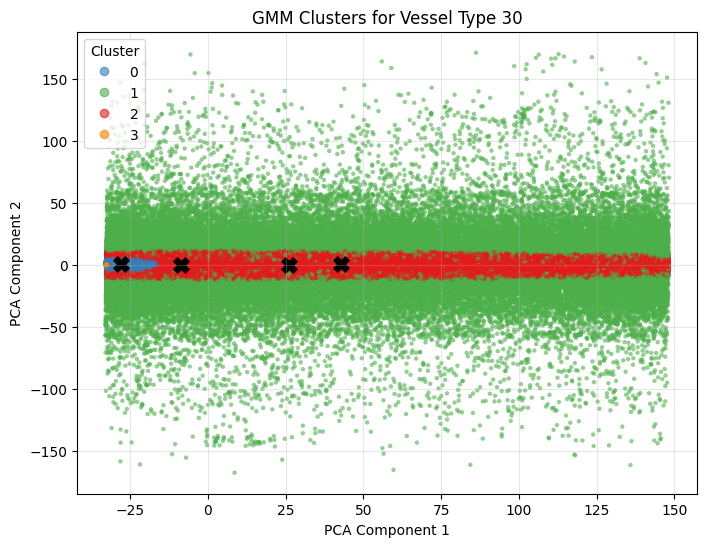

In [20]:

vtype = 30
vt_df_30, vt_centroids_30, (scaler, gmm) = fit_gmm_for_vtype(df, vtype=vtype, n_components=4)

# visualize in PCA space
visualize_gmm_clusters(
    df_clustered=vt_df_30,
    features=["sog", "accel_knots_per_hr", "turnrate_deg_per_min", "cog_spike_deg"],
    vtype=vtype,
    centroids=vt_centroids_30
)


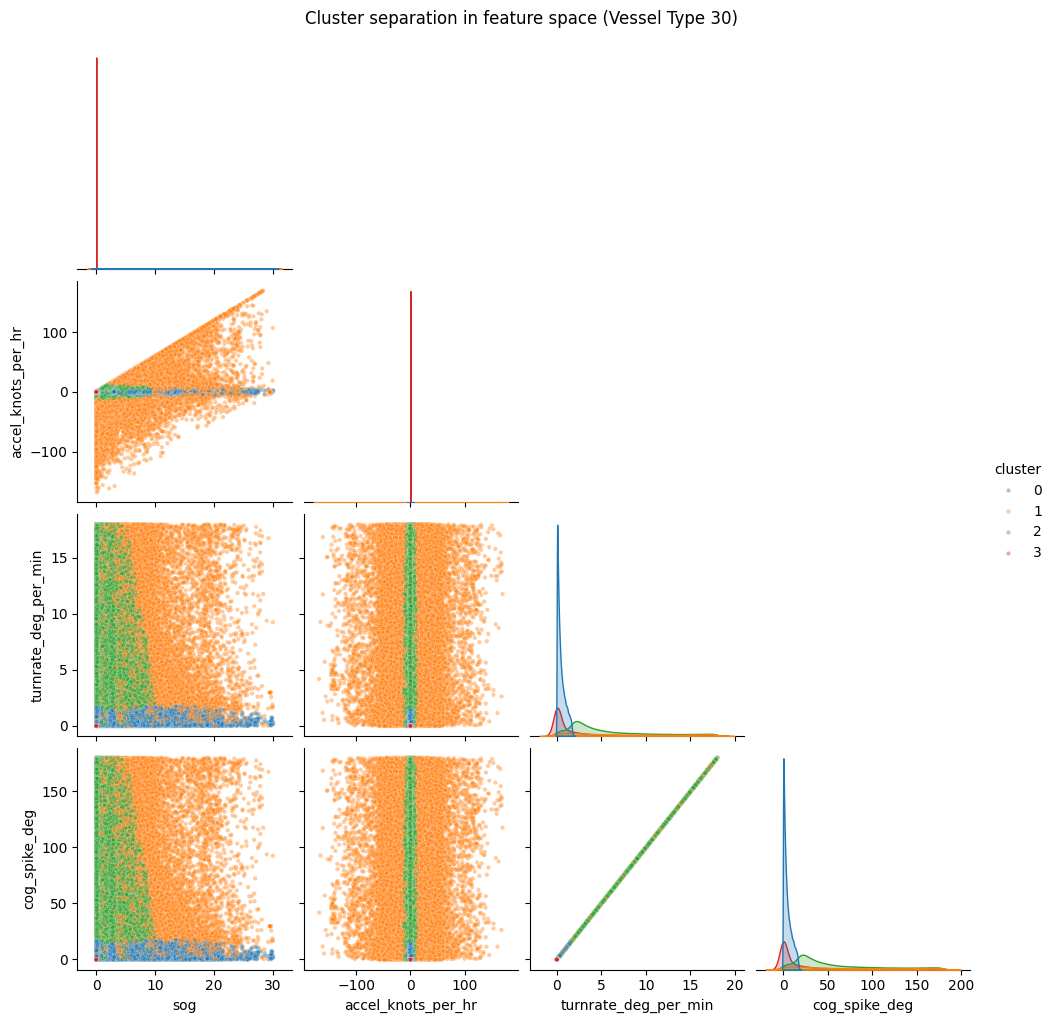

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ["sog", "accel_knots_per_hr", "turnrate_deg_per_min", "cog_spike_deg"]

sns.pairplot(
    vt_df_30,                 # the clustered DF for vessel type 30
    vars=features,
    hue="cluster",
    palette="tab10",
    corner=True,
    plot_kws={"alpha": 0.4, "s": 10}
)
plt.suptitle("Cluster separation in feature space (Vessel Type 30)", y=1.02)
plt.show()


In [22]:
with open("Cleaned_US_data/us_continent_2024_test_track.pkl", "rb") as f:
    test_list = pickle.load(f)

In [23]:
blocks = []
for v in tqdm(test_list, desc="Test getting denorm + features (10-min)"):
    traj = np.asarray(v["traj"])
    den  = denormalize_traj(traj)                  
    df   = add_per_step_features(den)              
    df   = add_window_features(df, win_steps=WIN_STEPS)  
    blocks.append(df)

test_augmented_df = pd.concat(blocks, ignore_index=True)

Test getting denorm + features (10-min):   0%|          | 0/13828 [00:00<?, ?it/s]

Test getting denorm + features (10-min): 100%|██████████| 13828/13828 [02:33<00:00, 90.25it/s] 


In [24]:
OUT_PKL  = "test_features.pkl"
OUT_CSV  = "test_features.csv"
test_augmented_df.to_pickle(OUT_PKL)
test_augmented_df.to_csv(OUT_CSV, index=False)
print(f"Saved: {OUT_PKL} and {OUT_CSV}")

Saved: test_features.pkl and test_features.csv


In [25]:
FEATURES = ["sog", "accel_knots_per_hr", "turnrate_deg_per_min", "cog_spike_deg"]

df30 = test_augmented_df.loc[test_augmented_df["vessel_type"] == 30.0].dropna(subset=FEATURES).copy()
print("Filtered rows for vtype 30:", len(df30))


Filtered rows for vtype 30: 44651


In [28]:

FEATURES = ["sog", "accel_knots_per_hr", "turnrate_deg_per_min", "cog_spike_deg"]

def score_test_with_gmm(test_augmented_df: pd.DataFrame,
                        vtype: int,
                        scaler,
                        gmm,
                        features=FEATURES) -> pd.DataFrame:
    d = test_augmented_df.copy()
    d["vessel_type"] = pd.to_numeric(d["vessel_type"], errors="coerce")
    t = d.loc[d["vessel_type"] == float(vtype)].dropna(subset=features).copy()
    print(f"[TEST] vtype={vtype} rows={len(t)}")

    Xs = scaler.transform(t[features].to_numpy())

    # posteriors γ_k(x) and cluster
    probs = gmm.predict_proba(Xs)
    t["cluster"]    = gmm.predict(Xs)
    t["confidence"] = probs.max(axis=1)

    # optional: keep all component posteriors
    for k in range(probs.shape[1]):
        t[f"gamma_k{k}"] = probs[:, k]

    # log p(x) under the mixture
    t["log_likelihood"] = gmm.score_samples(Xs)

    return t

# --- run for vessel type 30 with your existing vt_scaler / vt_gmm ---
pred30 = score_test_with_gmm(test_augmented_df, vtype=30,
                             scaler=vt_scaler, gmm=vt_gmm)

# quick look
display(pred30[[*FEATURES, "cluster", "confidence", "log_likelihood"]].head())

# summaries
print("\nConfidence stats:\n", pred30["confidence"].describe())
print("\nMean log-likelihood per cluster:\n", pred30.groupby("cluster")["log_likelihood"].mean())
print("\nCluster distribution:\n", pred30["cluster"].value_counts(normalize=True))

# save if you want
pred30.to_pickle("test_vtype30_with_gmm_scores.pkl")
pred30.to_csv("test_vtype30_with_gmm_scores.csv", index=False)


[TEST] vtype=30 rows=44651


,sog,accel_knots_per_hr,turnrate_deg_per_min,cog_spike_deg,cluster,confidence,log_likelihood
544,8.600000,0.000000,0.000000,0.000000,0,0.992608,5.342234
545,8.693750,0.562500,0.571875,5.718750,0,0.994183,5.585128
546,8.800000,0.637500,0.221875,2.218750,0,0.994590,5.547593
547,8.986765,1.120588,0.095882,0.958824,0,0.993483,5.212303
548,9.000000,0.079412,0.105882,1.058824,0,0.994936,5.416948



Confidence stats:
 count   44651.000000
mean        0.928994
std         0.111560
min         0.360748
25%         0.929325
50%         0.972005
75%         0.998494
max         1.000000
Name: confidence, dtype: float64

Mean log-likelihood per cluster:
 cluster
0    4.868291
1   -1.648035
2    1.683618
3   14.585650
Name: log_likelihood, dtype: float64

Cluster distribution:
 cluster
0   0.402701
2   0.287474
3   0.191530
1   0.118295
Name: proportion, dtype: float64


In [32]:
train_augmented_df.head

<bound method NDFrame.head of                lat        lon      sog        cog    heading  \
0        28.510860 -89.722550 9.200000  43.200000  47.000000   
1        28.531002 -89.704614 9.419936  40.233762  45.485531   
2        28.551534 -89.686476 9.180000  40.120000  42.400000   
3        28.571645 -89.669612 8.707339  33.911009  44.715596   
4        28.592046 -89.651920 9.597030  34.607921  44.782178   
...            ...        ...      ...        ...        ...   
14643153 40.715598 -74.018586 7.041429 318.125714 511.000000   
14643154 40.734698 -74.025465 5.970000 110.752857 511.000000   
14643155 40.716283 -74.017714 8.233824  52.348529 511.000000   
14643156 40.734989 -74.025947 1.459420 239.857971 511.000000   
14643157 40.715901 -74.017719 6.950000  77.464286 511.000000   

                 timestamp             mmsi  vessel_type     length     width  \
0        1704805702.000000 538007560.000000    70.000000 175.000000 28.000000   
1        1704806302.000000 538007560.00

In [31]:
df.head


<bound method NDFrame.head of           lat        lon      sog        cog    heading         timestamp  \
0   30.323378 -81.626306 0.000000 142.873770 511.000000 1709149843.000000   
1   30.323325 -81.626274 0.000000 144.817391 511.000000 1709150443.000000   
2   30.323402 -81.626277 0.000000 235.003279 511.000000 1709151043.000000   
3   30.323361 -81.626240 0.000000 294.737500 511.000000 1709151643.000000   
4   30.323352 -81.626271 0.000000 239.870423 511.000000 1709152243.000000   
..        ...        ...      ...        ...        ...               ...   
120 29.461260 -80.128274 7.800000 136.600000 511.000000 1709221843.000000   
121 29.448413 -80.108130 8.300000 115.148571 511.000000 1709222443.000000   
122 29.438871 -80.083851 8.400000 113.326230 511.000000 1709223043.000000   
123 29.429049 -80.060258 8.034286 120.448571 511.000000 1709223643.000000   
124 29.417572 -80.038482 7.708824 126.466176 511.000000 1709224243.000000   

                mmsi  vessel_type    length  

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# big DF with all train vessels + features
df = train_augmented_df.copy()

GMM_FEATURES = ["sog", "accel_knots_per_hr", "turnrate_deg_per_min", "cog_spike_deg"]
vt = 35

# make vessel_type numeric
df["vessel_type"] = pd.to_numeric(df["vessel_type"], errors="coerce")

# 1) filter only vessel_type 35
df35_raw = df[df["vessel_type"] == float(vt)].copy()
print("Rows for vessel_type=35 BEFORE dropping NaNs:", len(df35_raw))

# 2) drop rows ONLY if any of the 4 features is NaN
df35 = df35_raw.dropna(subset=GMM_FEATURES).copy()
print("Rows for vessel_type=35 AFTER dropping NaNs in GMM_FEATURES:", len(df35))

# sanity: other columns may still have NaNs and that's fine
print("\nNaNs in non-feature columns (still allowed):")
print(df35.drop(columns=GMM_FEATURES).isna().sum().head())


Rows for vessel_type=35 BEFORE dropping NaNs: 43280
Rows for vessel_type=35 AFTER dropping NaNs in GMM_FEATURES: 43280

NaNs in non-feature columns (still allowed):
lat          0
lon          0
cog          0
heading      0
timestamp    0
dtype: int64


In [42]:
train_augmented_df.head

<bound method NDFrame.head of                lat        lon      sog        cog    heading  \
0        28.510860 -89.722550 9.200000  43.200000  47.000000   
1        28.531002 -89.704614 9.419936  40.233762  45.485531   
2        28.551534 -89.686476 9.180000  40.120000  42.400000   
3        28.571645 -89.669612 8.707339  33.911009  44.715596   
4        28.592046 -89.651920 9.597030  34.607921  44.782178   
...            ...        ...      ...        ...        ...   
14643153 40.715598 -74.018586 7.041429 318.125714 511.000000   
14643154 40.734698 -74.025465 5.970000 110.752857 511.000000   
14643155 40.716283 -74.017714 8.233824  52.348529 511.000000   
14643156 40.734989 -74.025947 1.459420 239.857971 511.000000   
14643157 40.715901 -74.017719 6.950000  77.464286 511.000000   

                 timestamp             mmsi  vessel_type     length     width  \
0        1704805702.000000 538007560.000000    70.000000 175.000000 28.000000   
1        1704806302.000000 538007560.00

In [43]:
df.head

<bound method NDFrame.head of                lat        lon      sog        cog    heading  \
0        28.510860 -89.722550 9.200000  43.200000  47.000000   
1        28.531002 -89.704614 9.419936  40.233762  45.485531   
2        28.551534 -89.686476 9.180000  40.120000  42.400000   
3        28.571645 -89.669612 8.707339  33.911009  44.715596   
4        28.592046 -89.651920 9.597030  34.607921  44.782178   
...            ...        ...      ...        ...        ...   
14643153 40.715598 -74.018586 7.041429 318.125714 511.000000   
14643154 40.734698 -74.025465 5.970000 110.752857 511.000000   
14643155 40.716283 -74.017714 8.233824  52.348529 511.000000   
14643156 40.734989 -74.025947 1.459420 239.857971 511.000000   
14643157 40.715901 -74.017719 6.950000  77.464286 511.000000   

                 timestamp             mmsi  vessel_type     length     width  \
0        1704805702.000000 538007560.000000    70.000000 175.000000 28.000000   
1        1704806302.000000 538007560.00

In [44]:
# ---- scale + fit GMM ----
X = df35[GMM_FEATURES].to_numpy()

vt_scaler_35 = StandardScaler().fit(X)
Xs = vt_scaler_35.transform(X)

n_components = 4
vt_gmm_35 = GaussianMixture(
    n_components=n_components,
    covariance_type="full",
    random_state=42,
    n_init=5,
    reg_covar=1e-6,
).fit(Xs)

# ---- cluster assignments + posteriors on TRAIN ----
proba = vt_gmm_35.predict_proba(Xs)
df35["cluster"] = vt_gmm_35.predict(Xs)
df35["confidence"] = proba.max(axis=1)
for k in range(n_components):
    df35[f"post_k{k}"] = proba[:, k]

# log-likelihood for each 10-min point
df35["log_likelihood"] = vt_gmm_35.score_samples(Xs)

# ---- centroids in original units for interpretation ----
vt_centroids_35 = (
    df35.groupby("cluster")[GMM_FEATURES]
        .mean()
        .reset_index()
        .sort_values("cluster")
)
vt_centroids_35["count"] = df35.groupby("cluster").size().sort_index().values
vt_centroids_35["gmm_weight"] = vt_gmm_35.weights_

print("\nCentroids (original units) for vessel_type=35:")
print(vt_centroids_35)



Centroids (original units) for vessel_type=35:
   cluster      sog  accel_knots_per_hr  turnrate_deg_per_min  cog_spike_deg  \
0        0 0.037550           -0.000856              5.286779      52.867794   
1        1 8.964989            0.056586              0.193305       1.933052   
2        2 7.144260           -0.015539              8.382964      83.829636   
3        3 8.636081            0.014244              1.585689      15.856888   

   count  gmm_weight  
0  11669    0.268518  
1  13657    0.306779  
2   9035    0.216710  
3   8919    0.207993  


In [45]:
import plotly.io as pio
pio.renderers.default = "browser"

In [46]:
fig = px.scatter_3d(
    df35,
    x="sog",
    y="turnrate_deg_per_min",
    z="cog_spike_deg",
    color="cluster",
    hover_data=["confidence", "log_likelihood"],
    opacity=0.4,
    title="GMM clusters for vessel_type=35 (TRAIN)",
)
fig.update_traces(marker=dict(size=2))
fig.show()   # this will now pop up in your browser


In [47]:
print('hello')

hello


In [48]:
test_df = pd.read_pickle("test_features.pkl")
print(test_df.shape)

(1616111, 32)


In [49]:
vt = 35
test35 = test_df[test_df["vessel_type"] == float(vt)].copy()
print(test35.shape)

(7483, 32)


In [50]:
GMM_FEATURES = ["sog", "accel_knots_per_hr", "turnrate_deg_per_min", "cog_spike_deg"]


In [51]:
X_test_raw = test35[GMM_FEATURES].dropna().copy()


In [52]:
test35 = test35.loc[X_test_raw.index].copy()


In [53]:
Xs_test = vt_scaler.transform(X_test_raw)


c:\Users\bathu\Desktop\GQP\.venv\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



In [54]:
test35["cluster"] = vt_gmm.predict(Xs_test)

proba = vt_gmm.predict_proba(Xs_test)

for k in range(vt_gmm.n_components):
    test35[f"post_k{k}"] = proba[:, k]

# confidence = highest posterior prob
test35["confidence"] = proba.max(axis=1)


In [55]:
test35["log_likelihood"] = vt_gmm.score_samples(Xs_test)


In [56]:
def map_behaviors_from_centroids(centroids_df):
    mapping = {}
    for idx, row in centroids_df.iterrows():
        if row["sog"] < 1.0:
            mapping[idx] = "Stopped"
        elif row["turnrate_deg_per_min"] > 6:
            mapping[idx] = "Turning"
        elif row["cog_spike_deg"] > 40:
            mapping[idx] = "Loitering"
        else:
            mapping[idx] = "Cruising"
    return mapping


In [57]:
behavior_map_35 = map_behaviors_from_centroids(vt_centroids_35)
test35["behavior"] = test35["cluster"].map(behavior_map_35)


In [58]:
test35.head()

,lat,lon,sog,cog,heading,timestamp,mmsi,vessel_type,length,width,...,w_path_km,w_straightness,cluster,post_k0,post_k1,post_k2,post_k3,confidence,log_likelihood,behavior
954,40.672620,-74.090380,0.000000,225.000000,511.000000,1709046716.000000,338926144.000000,35.000000,7.000000,3.000000,...,NaN,NaN,3,0.000023,0.000000,0.000001,0.999976,0.999976,14.973471,Cruising
955,40.672688,-74.090061,0.077148,156.209961,511.000000,1709047316.000000,338926144.000000,35.000000,7.000000,3.000000,...,NaN,NaN,2,0.000000,0.021970,0.978030,0.000000,0.978030,2.366966,Turning
956,40.672536,-74.088499,4.476190,95.011640,511.000000,1709047916.000000,338926144.000000,35.000000,7.000000,3.000000,...,NaN,NaN,1,0.000000,1.000000,0.000000,0.000000,1.000000,-1.146747,Cruising
957,40.661987,-74.063060,16.090000,130.310000,511.000000,1709048516.000000,338926144.000000,35.000000,7.000000,3.000000,...,NaN,NaN,1,0.000000,1.000000,0.000000,0.000000,1.000000,-4.148867,Cruising
958,40.604525,-74.046504,19.116901,168.212676,511.000000,1709049116.000000,338926144.000000,35.000000,7.000000,3.000000,...,NaN,NaN,1,0.000000,1.000000,0.000000,0.000000,1.000000,-5.942725,Cruising


In [59]:
fig = px.scatter_3d(
    test35,
    x="sog",
    y="turnrate_deg_per_min",
    z="cog_spike_deg",
    color="cluster",
    hover_data=["confidence", "log_likelihood", "behavior"],
    opacity=0.6,
    title="GMM clusters for vessel_type=35 (TEST)",
)
fig.update_traces(marker=dict(size=3))
fig.show()


In [62]:
# Step 1: Filter the dataset for vessel types 70 to 79
vessel_types = range(70, 80)  # vessel types 70 to 79
df_vt_all = df[df['vessel_type'].isin(vessel_types)].copy()

# Step 2: Feature Engineering for the combined dataset
df_vt_all = add_per_step_features(df_vt_all)
df_vt_all = add_window_features(df_vt_all, win_steps=1)

# Step 3: Prepare Data for GMM
X_vt_all_raw = df_vt_all[GMM_FEATURES].dropna()  # Drop NaN values
Xs_vt_all = vt_scaler.transform(X_vt_all_raw)  # Use the same scaler as before

# Step 4: Fit GMM for the combined dataset (vessel types 70 to 79)
vt_all_gmm = GaussianMixture(n_components=4, covariance_type="full", random_state=42)
vt_all_gmm.fit(Xs_vt_all)

# Step 5: Assign clusters and posterior probabilities for the combined dataset
df_vt_all["cluster"] = vt_all_gmm.predict(Xs_vt_all)
proba_vt_all = vt_all_gmm.predict_proba(Xs_vt_all)
df_vt_all["confidence"] = proba_vt_all.max(axis=1)
df_vt_all["log_likelihood"] = vt_all_gmm.score_samples(Xs_vt_all)

# Step 6: Store centroids for the combined dataset (vessel types 70 to 79)
vt_all_centroids = pd.DataFrame(vt_all_gmm.means_, columns=GMM_FEATURES)
vt_all_centroids["count"] = df_vt_all.groupby("cluster").size().values
vt_all_centroids["gmm_weight"] = vt_all_gmm.weights_

# Print the centroids (in original units)
print(f"Centroids for vessel types 70-79:")
print(vt_all_centroids)

# Step 7: Visualize the GMM clusters for the combined dataset in 3D
import plotly.express as px

fig = px.scatter_3d(
    df_vt_all,
    x="sog",
    y="turnrate_deg_per_min",
    z="cog_spike_deg",
    color="cluster",
    hover_data=["confidence", "log_likelihood"],
    opacity=0.6,
    title="GMM Clusters for Vessel Types 70-79 (Cargo)",
)

fig.update_traces(marker=dict(size=5))
fig.show()

# Optional: Save the results for later use
df_vt_all.to_pickle("vessel_types_70_to_79_features.pkl")
vt_all_centroids.to_pickle("vessel_types_70_to_79_centroids.pkl")


c:\Users\bathu\Desktop\GQP\.venv\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Centroids for vessel types 70-79:
        sog  accel_knots_per_hr  turnrate_deg_per_min  cog_spike_deg    count  \
0  2.185596            0.002552             -0.681838      -0.681838  1083962   
1 -0.977528           -0.000724             -0.303496      -0.303496   516994   
2  0.613941           -0.005392              0.702986       0.702986   399022   
3  1.286331           -0.003493             -0.493662      -0.493662   543031   

   gmm_weight  
0    0.416297  
1    0.203277  
2    0.161854  
3    0.218573  


In [63]:
# Step 1: Filter the test dataset for vessel types 70 to 79
df_test_vt_all = test_df[test_df['vessel_type'].isin(vessel_types)].copy()

# Step 2: Feature Engineering for the filtered test dataset
df_test_vt_all = add_per_step_features(df_test_vt_all)
df_test_vt_all = add_window_features(df_test_vt_all, win_steps=1)

# Step 3: Prepare the test data for GMM (use the same features as training)
X_test_vt_all_raw = df_test_vt_all[GMM_FEATURES].dropna()  # Drop NaN values
Xs_test_vt_all = vt_scaler.transform(X_test_vt_all_raw)  # Use the same scaler used for training

# Step 4: Assign clusters and calculate posterior probabilities using the trained GMM model
df_test_vt_all["cluster"] = vt_all_gmm.predict(Xs_test_vt_all)
proba_test_vt_all = vt_all_gmm.predict_proba(Xs_test_vt_all)
df_test_vt_all["confidence"] = proba_test_vt_all.max(axis=1)
df_test_vt_all["log_likelihood"] = vt_all_gmm.score_samples(Xs_test_vt_all)

# Step 5: Visualize the test results in 3D (for example, with `sog`, `turnrate_deg_per_min`, and `cog_spike_deg`)
import plotly.express as px

fig = px.scatter_3d(
    df_test_vt_all,
    x="sog",
    y="turnrate_deg_per_min",
    z="cog_spike_deg",
    color="cluster",
    hover_data=["confidence", "log_likelihood"],
    opacity=0.6,
    title="Test Data GMM Clusters for Vessel Types 70-79",
)

fig.update_traces(marker=dict(size=5))
fig.show()

# Optional: Save the results for later use
df_test_vt_all.to_pickle("vessel_types_70_to_79_test_features.pkl")


c:\Users\bathu\Desktop\GQP\.venv\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

